In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Part 1

$$ 
\begin{align*}
\emptyset &\rightarrow X & \text{at a rate } k_1 = 1 \\
X &\rightarrow Y & \text{at a rate } k_2 = 2 \\
2X + Y &\rightarrow 3X & \text{at a rate } k_3 = 0.02 \\
X &\rightarrow \emptyset & \text{at a rate } k_4 = 0.04 \\
\end{align*}
$$

$$
\frac{d[X]}{dt} = 1 - 2.04[X] + 0.02[X]^2[Y]
\\
\frac{d[Y]}{dt} = 2[X] - 0.02[X]^2[Y]
$$

# Part 2

In [2]:
def dx_dt(x, y):
    return 1 - (2.04 * x) + (0.02 * x**2 * y)

def dy_dt(x, y):
    return (2 * x) - (0.02 * x**2 * y)

In [3]:
def solve_dif(Z, t):
    x,y = Z
    dxdt = dx_dt(x,y)
    dydt = dy_dt(x,y)
    return [dxdt, dydt]

z0 = [0,0]
t = range(500)
sol = odeint(solve_dif, z0, t)

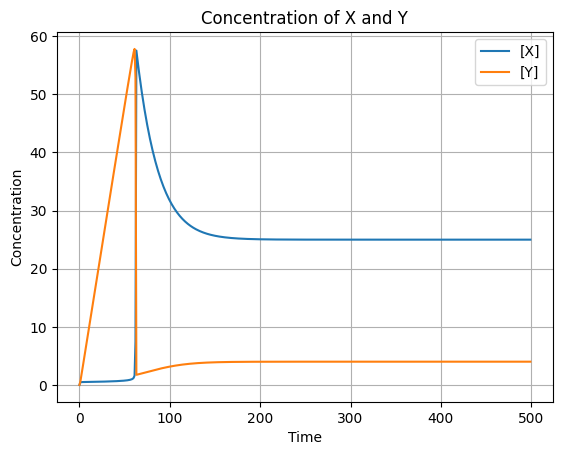

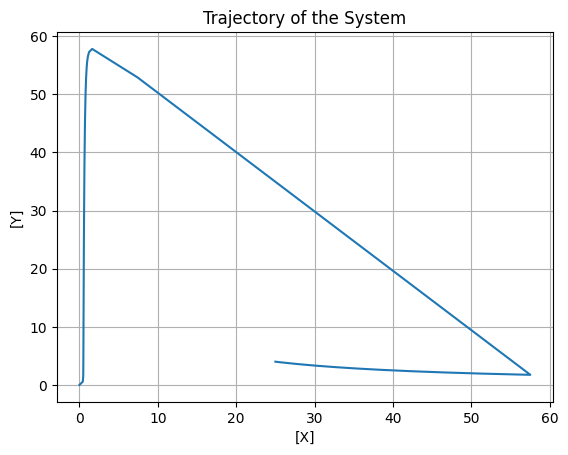

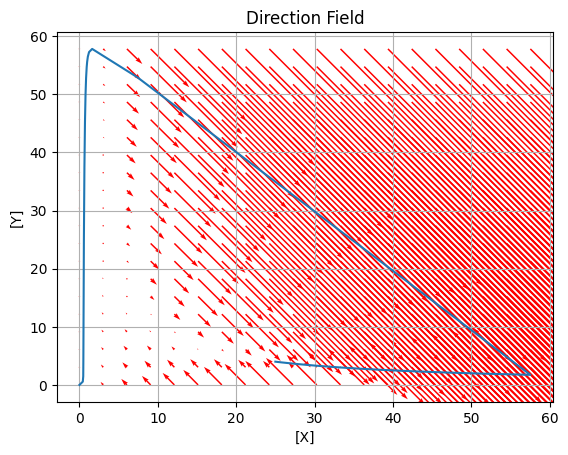

In [4]:
X = sol[:, 0]
Y = sol[:, 1]

plt.plot(t, X, label='[X]')
plt.plot(t, Y, label='[Y]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration of X and Y')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X, Y)
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Trajectory of the System')
plt.grid(True)
plt.show()

plt.plot(X, Y)
x_range = np.linspace(min(X), max(X), 20)
y_range = np.linspace(min(Y), max(Y), 20)
X, Y = np.meshgrid(x_range, y_range)
U = dx_dt(X, Y)
V = dy_dt(X, Y)
plt.quiver(X, Y, U, V, scale=1000, color='r')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Direction Field')
plt.grid(True)
plt.show()

## Explain the pattern you see

The Y concentration initially rapidly grows but it soon drops down as it tends towards an increase in the growth in X.

# Part 3

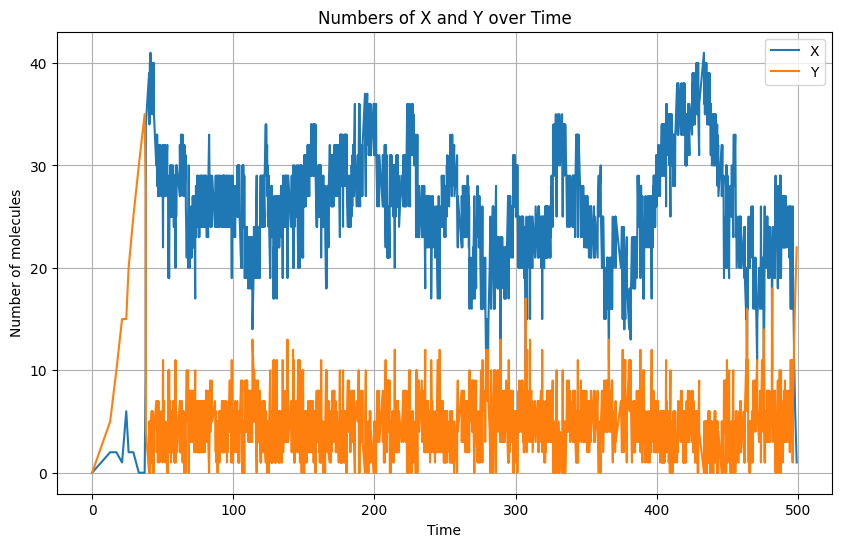

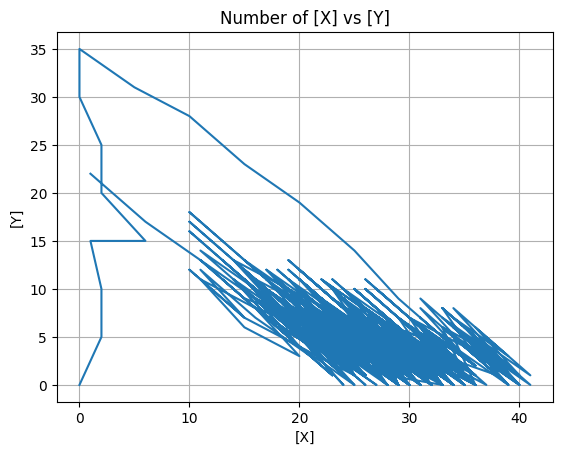

In [5]:
# Reaction rates
k1 = 1
k2 = 2
k3 = 0.02
k4 = 0.04

X = 0
Y = 0
t = 0

X_counts = [X]
Y_counts = [Y]
times = [t]

while t < 500:

    eq1 = k1
    eq2 = k2 * X
    eq3 = k3 * X**2 * Y
    eq4 = k4 * X

    eqs = eq1 + eq2 + eq3 + eq4

    dt = -np.log(np.random.uniform()) / eqs
    r = np.random.uniform() * eqs
    
    if r < eq1:
        X += 1
    elif r < eq1 + eq2:
        X -= 1
        Y += 1
    elif r < eq1 + eq2 + eq3:
        X += 1
        Y -= 1
    else:
        X -= 1
    
    t += dt
   
    if abs(X_counts[-1] - X) >= 5 or abs(Y_counts[-1] - Y) >= 5:
        X_counts.append(X)
        Y_counts.append(Y)
        times.append(t)

plt.figure(figsize=(10, 6))
plt.plot(times, X_counts, label='X')
plt.plot(times, Y_counts, label='Y')
plt.xlabel('Time')
plt.ylabel('Number of molecules')
plt.title('Numbers of X and Y over Time')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X_counts, Y_counts)
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Number of [X] vs [Y]')
plt.grid(True)
plt.show()


### Describe how these plots compare with the ODE model

Similarly to the ODE model, there is a significant increase in the growth of Y at the beginning compared to X, but it soon drops down at a sort of equilibrium where the count of X is constantly larger than the count of Y.